## Введение

Попытка построить график функции $y=\dfrac{(x-3)^2(x+2)}{x(x+4)}$ с помощью вызова функции `plot`
библиотеки SymPy приводит к не слишком хорошему результату:

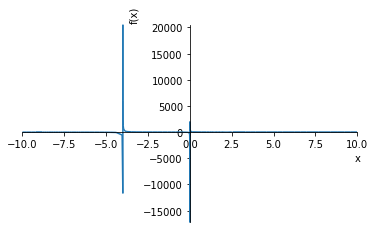

In [1]:
from sympy import *
%matplotlib inline
var('x')
y = (x-3)**2*(x+2)/(x*(x+4))
plot(y)

Правильно подобранные интервалы изменения переменной `x` и функции `y` делают график немного лучше:

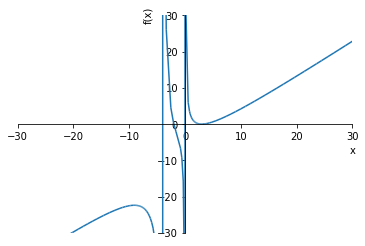

In [2]:
plot(y, (x,-30,30), ylim=(-30,30))

Но и здесь не всё хорошо. У графика этой функции должны быть вертикальные асимптоты, но функция
`plot` изобразила нечто весьма странное (хотя отчасти и похожее на реальный график).

Боле важно то, что часто бывает необходимо провести достаточно полное исследование заданной функции, определить координаты экстремумов, найти и изобразить асимптоты её графика. Подобную задачу и предлагается решить в этом домашнем задании.

## Требования

**С помощью библиотек** языка Python необходимо:

- найти все асимптоты графика заданной функции;
- найти все точки экстремума функции;
- построить эскиз графика функции;
- изобразить все асимптоты графика;
- соединить пунктирной линией (см. образец) экстремумы
  функции с координатными осями;
- подписать на горизонтальной оси точки, через которые
  проходят вертикальные асимптоты (отличные от оси $OY$);
- подписать на горизонтальной оси точки экстремума,
  а на вертикальной оси — значения функции в них;
  использовать для этого ровно три значащих десятичных цифры;
- изменить при необходимости масштаб таким образом,
  чтобы были хорошо видны все экстремумы функции и факт
  приближения графика функции к его асимптотам при
  удалении от начала координат;
- в свободной от изображённых линий области рисунка
  разместить текст, содержащий задание рассматриваемой
  функции, координаты её точек экстремума и уравнения
  всех асимтот её графика. 
  
**Все требования обязательны для выполнения.**  
  

## Рекомендации

- для нахождения невертикальной асимтототы можно воспользоваться
  фунцией `limit` библиотеки SymPy;
- точки экстремума могут быть найдены с помощью функции `nroots`
  библиотеки SymPy; учтите, что
    - эта функция работает с многочленами;
    - нет необходимости находить точки экстремума с высокой точностью;
- для выбора из списка (комплексных) чисел `lst` только действительных
  можно использовать *фильтр* языка Python:  
  `list(filter(lambda t: t.is_real, lst))`;
- функция `N` библиотеки SymPy позволяет получить представление числа
  с заданным количеством значащих десятичных цифр;
- для изображения на рисунке текста можно воспользоваться функцией `text`,
  с параметрами которой следует предварительно ознакомиться; 
- при работе в Jupyter Notebook вместо функции `print`часто
  удобнее использовать функцию `display`;
- для создания графика требуемой функции может быть полезен 
  приведённый ниже пример построения графика функции $y=-x^4+x^2$;
- изменение масштаба графика может потребовать изменения только
  только одной величины `xymax`.
  
**Рекомендации не являются обязательными. Для достижения требуемого
результата можно воспользоваться иными функциями, методами и библиотеками
языка Python.**

## Пример построения графика

Этот пример показывает, как может быть выполнена лишь **некоторая часть требований**. 

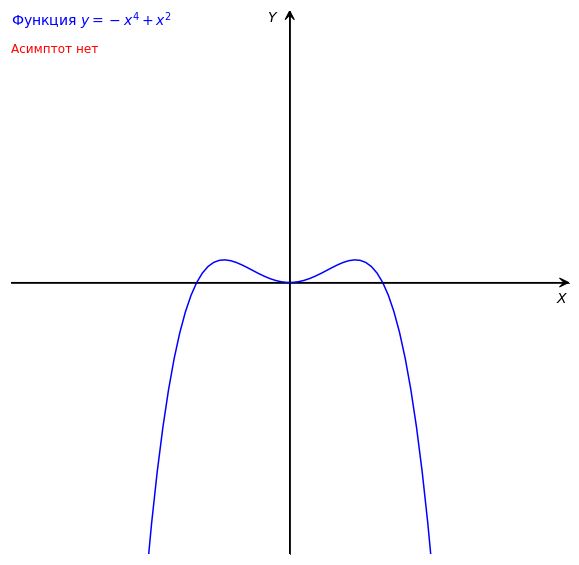

In [3]:
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline
init_printing()
import numpy as np

# Максимальные рассматриваемые значения переменных x и y
# подбирается для каждой из функций индивидуально
xymax = 3

# Диапазон [-xymax, xymax] определяет ряд параметров,
# связанных с изображением стрелок на осях координат
# и величинами смещений подписей
head_len = xymax/30
offset = head_len/4

# Текущий рисунок
fig = plt.gcf()
# Размер рисунка в дюймах
fig.set_size_inches(10, 10)
# Область рисования
ax = plt.gca()

# Интервалы изменения данных
ax.set_xlim(-xymax, xymax)
ax.set_ylim(-xymax, xymax)

# Убираем стандартные деления (и подписи) на 
# границах области данных (будущих осях)
ax.set_xticks([])
ax.set_yticks([])

# Преобразуем границы области данных:
# рисуем стрелочки и подписываем оси координат
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_color('none')
ax.arrow(-xymax, 0.0, 2*xymax, 0.0, head_width=head_len,
    head_length=head_len, overhang = 0.5, color='k',
    length_includes_head= True) 
ax.arrow(0.0, -xymax, 0.0, 2*xymax, head_width=head_len,
    head_length=head_len, overhang = 0.5, color='k',
    length_includes_head= True) 
ax.text(1.0, 0.47, '$X$', fontsize=14, transform=ax.transAxes, 
    verticalalignment='center', horizontalalignment='right')
ax.text(0.47, 1.0, '$Y$', fontsize=14, transform=ax.transAxes, 
    verticalalignment='top', horizontalalignment='center')

x = np.linspace(-xymax, xymax, 100)
y = x**2 - x**4
plt.plot(x, y, 'b-')

var('x')
ax.text(0, 1.0, f'Функция $y = {latex(x**2 - x**4)}$', fontsize=14,
    transform=ax.transAxes, color='b', verticalalignment='top')
ax.text(0, 0.94, 'Асимптот нет', fontsize=12,
    transform=ax.transAxes, color='r', verticalalignment='top')

plt.show()